# CS 771 Final Project

## Table of Contents

1. [Team Members](#team-members)
2. [Executive Summary](#executive-summary)
3. [Step 1. Statistics on departure delay (A8) and arrival delay (A9).](#step-1-statistics-on-departure-delay-a8-and-arrival-delay-a9)
   * [1a. Data on Departure Delay and Arrival Delay](#1a-data-on-departure-delay-and-arrival-delay)
   * [1b. Data Analysis](#1b-data-analysis)   
4. [Step 2. Conversion of Numeric to Categoical Values](#step-2-convert-numerical-values-to-categorical-values)
   * [2a. Discretization](#2a-discretize-of-numerical-values)
   * [2b. Analysis of Discretization](#2b-analysis)
5. [Step 3. Testing Hypotheses](#step-3-test-the-following-two-hypotheses-show-evidence-to-show-whether-they-are-true-or-false)
6. [Step 4. Association Between Attributes](#step-4-find-associations-between-some-of-the-important-attributes)
7. [Step 5. Reduction with PCA](#step-5-reduce-the-satisfaction-features-using-pca)
8. [Step 6. Linear Regression](#step-6-using-linear-regression)
9. [Step 7. Data mining Techniques](#step-7-using-data-mining-techniques)
10. [Step 8](#step-8-other-questions)
11. [Appendix](#appendix)

## Team Members

| Name | Email | Portfolio|
|:------:|:-------:|:----------:|
| Ryan Hiltabrand | rhilt001@odu.edu | https://ryhiltabrand.github.io |

## Executive Summary

[NEED TO DO.....]

## Step 1. Statistics on departure delay (A8) and arrival delay (A9).

### a.) Data on Departure Delay and Arrival Delay

#### Mean

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../airline_passenger_satisfaction.csv").set_index("ID")

means = df[["Departure Delay", "Arrival Delay"]].mean()
print(f'Mean | Depature Delay: {means[0]} | Arrival Delay: {means[1]}')

Mean | Depature Delay: 14.713712657838004 | Arrival Delay: 15.09112883918849


#### Mode

In [7]:
modes = df[["Departure Delay", "Arrival Delay"]].mode(axis='rows')
print(modes)

   Departure Delay  Arrival Delay
0                0            0.0


#### Median

In [8]:
medians = df[["Departure Delay", "Arrival Delay"]].median(axis='rows')
print(medians.transpose())

Departure Delay    0.0
Arrival Delay      0.0
dtype: float64


#### Standard Deviation

In [9]:
std = df[["Departure Delay", "Arrival Delay"]].std()
print(std)

Departure Delay    38.071126
Arrival Delay      38.465650
dtype: float64


#### Percentiles

In [10]:
tenth = df[["Departure Delay", "Arrival Delay"]].quantile(.1)
fifty = df[["Departure Delay", "Arrival Delay"]].quantile(.5)
sevfitth = df[["Departure Delay", "Arrival Delay"]].quantile(.75)
ninetieth = df[["Departure Delay", "Arrival Delay"]].quantile(.9)
print(tenth)
print(fifty)
print(sevfitth)
print(ninetieth)

Departure Delay    0.0
Arrival Delay      0.0
Name: 0.1, dtype: float64
Departure Delay    0.0
Arrival Delay      0.0
Name: 0.5, dtype: float64
Departure Delay    12.0
Arrival Delay      13.0
Name: 0.75, dtype: float64
Departure Delay    44.0
Arrival Delay      44.0
Name: 0.9, dtype: float64


#### Quartiles

In [11]:
first = df[["Departure Delay", "Arrival Delay"]].quantile(.25)
second = df[["Departure Delay", "Arrival Delay"]].quantile(.5)
third = df[["Departure Delay", "Arrival Delay"]].quantile(.75)
print(first)
print(second)
print(third)

Departure Delay    0.0
Arrival Delay      0.0
Name: 0.25, dtype: float64
Departure Delay    0.0
Arrival Delay      0.0
Name: 0.5, dtype: float64
Departure Delay    12.0
Arrival Delay      13.0
Name: 0.75, dtype: float64


#### Skewness

In [12]:
Skew = df[["Departure Delay", "Arrival Delay"]].skew(axis=0)
print(Skew)

Departure Delay    6.821980
Arrival Delay      6.670125
dtype: float64


#### Covariance

In [13]:
Cover = df["Departure Delay"].cov(df["Arrival Delay"])
print(f'Coverage: {Cover}')

Coverage: 1408.4683136123394


#### Correlation

In [14]:
Corr = df["Departure Delay"].corr(df["Arrival Delay"])
print(Corr) 

0.9652911835463213


#### Box Plot and Histogram

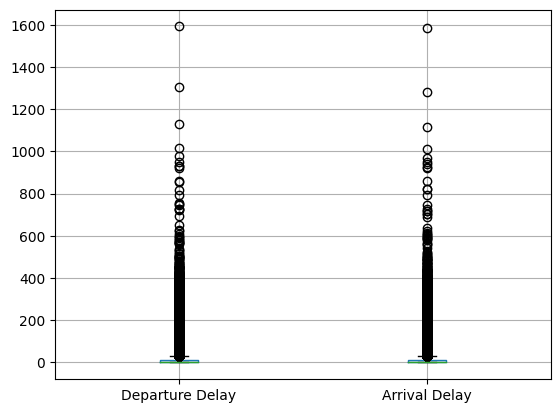

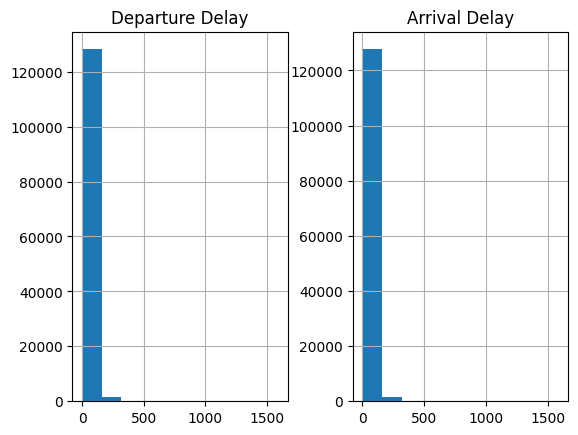

In [15]:
boxplot = df.boxplot(column=['Departure Delay',"Arrival Delay"])
boxplot.plot()
histplot = df.hist(column=['Departure Delay',"Arrival Delay"])
plt.show()

### b.) Data Analysis

jljkl

## Step 2. Convert numerical values to categorical values

### a.) Discretize of Numerical Values

#### i.) Discretize Age

In [33]:
df["Age"] = pd.cut(x = df["Age"], bins=[0, 15, 35, 55, 70, 1000], labels=["Child","Youth", "Middle Age", "Old", "Senior"])
print(df["Age"].head)

<bound method NDFrame.head of ID
1         Middle Age
2              Youth
3         Middle Age
4         Middle Age
5         Middle Age
             ...    
129876         Youth
129877    Middle Age
129878    Middle Age
129879    Middle Age
129880         Youth
Name: Age, Length: 129880, dtype: category
Categories (5, object): ['Child' < 'Youth' < 'Middle Age' < 'Old' < 'Senior']>


#### ii.) Discretize Flight Distance

In [34]:
df["Flight Distance"] = pd.cut(x = df["Flight Distance"], bins=[0, 500, 3000, 100000], labels=["Short Haul","Medium Hall", "Long Haul"])
print(df["Flight Distance"].head)

<bound method NDFrame.head of ID
1         Medium Hall
2         Medium Hall
3         Medium Hall
4         Medium Hall
5           Long Haul
             ...     
129876     Short Haul
129877     Short Haul
129878     Short Haul
129879     Short Haul
129880     Short Haul
Name: Flight Distance, Length: 129880, dtype: category
Categories (3, object): ['Short Haul' < 'Medium Hall' < 'Long Haul']>


#### iii.) Discretize Delays

In [44]:
df["Departure Delay"] = pd.cut(x = df["Departure Delay"], bins=[-1, 15, 45, 1000], labels=["Small", "Medium", "Long"])
df["Arrival Delay"] = pd.cut(x = df["Arrival Delay"], bins=[-1, 15, 45, 1000], labels=["Small", "Medium", "Long"])
print(df[["Departure Delay","Arrival Delay"]].head)

<bound method NDFrame.head of        Departure Delay Arrival Delay
ID                                  
1                Small         Small
2               Medium        Medium
3                Small         Small
4                Small         Small
5                Small         Small
...                ...           ...
129876           Small         Small
129877           Small         Small
129878           Small         Small
129879          Medium        Medium
129880           Small         Small

[129880 rows x 2 columns]>


#### iv.) Plots

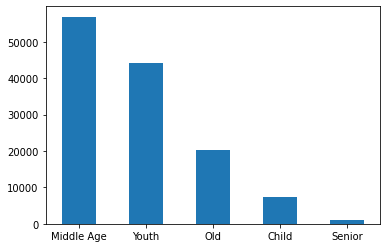

In [49]:
df["Age"].value_counts().plot.bar(rot=0)
plt.show()

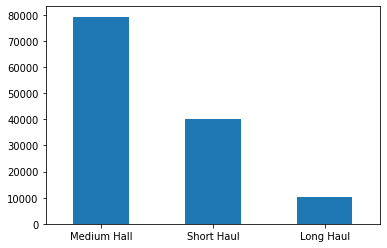

In [50]:
df["Flight Distance"].value_counts().plot.bar(rot=0)
plt.show()

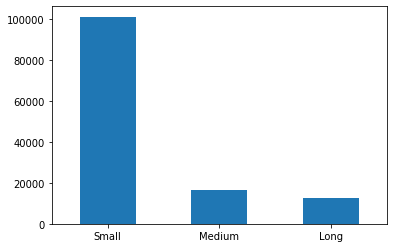

In [52]:
df["Departure Delay"].value_counts().plot.bar(rot=0)
plt.show()

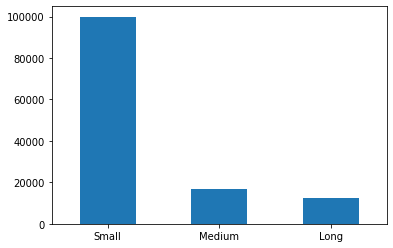

In [53]:
df["Arrival Delay"].value_counts().plot.bar(rot=0)
plt.show()

### b.) Analysis

## Step 3. Test the following two hypotheses. Show evidence to show whether they are true or false. 

### H1.)

1. State the Hypothesis
   * Hypothesis: Long haul passengers’ overall satisfaction is influenced more by the in-flight service quality than by the departure delays. 

   * This Hypothesis is a claim to establish a new truth 
  
2. Forumulate the Hypothesis
   * Null Hypothesis: Long haul passengers’ overall satisfaction **is not** influenced more by the in-flight service quality than by the departure delays.

   * Alternative Hypothesis: Long haul passengers’ overall satisfaction is influenced more by the in-flight service quality than by the departure delays. 
  
3. Set Criteria
   * 
4. Determine Signifigance
5. Compute Test Statistics
6. Calculate P-Value
7. Compare P-Value to level of Signifigance
8. Reject or Fail to Reject Null Hypothesis
   







In [26]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = df["On-board Service"]
Y = df["Satisfaction"]

X = sm.add_constant(X)

model= sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = df["Departure Delay"]
Y = df["Satisfaction"]

X = sm.add_constant(X)

model= sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()


### H2.)

Medium haul passengers’ overall satisfaction is influenced more by the arrival delays than by the 
in-flight entertainment.

### H3.)

Make your own hypothesis, state it, and test it.

## Step 4. Find associations between some of the important attributes.

### a.) Association Rules

Using weka's Apriori algorithm to generate the top 20 assocciation Rules using the following attributes: Gender, Age, Type of travel, Flight distance, Class, Arrival delays, and Overall satisfaction.

![Association.png](Association.png)


### b.) Explanation of 4a

## Step 5. Reduce the satisfaction features using PCA.

### a.) Principal Component Analysis

#### PCAS

![PCA.jpg](PCA.jpg)

MINS: -4.559
MAXS: 6.154
AVES: 0
STDS: 1.949


| Feature | AVES | MINS | MAXS | STDS |
|:------:|:-------:|:----------:|:-------:|:----------:|
| PCAS | 0 | -4.559 | 6.154 | 1.949 | 
| A10 | 3.058 | 0 | 5 | 1.527 | 
| A11 | 2.757 | 0 | 5 | 1.402 | 
| A12 | 3.306 | 0 | 5 | 1.266 | 
| A13 | 3.253 | 0 | 5 | 1.351 | 
| A14 | 2.977 | 0 | 5 | 1.279 | 
| A15 | 3.383 | 0 | 5 | 1.287 | 
| A16 | 3.441 | 0 | 5 | 1.319 | 
| A17 | 3.351 | 0 | 5 | 1.316 | 
| A18 | 3.286 | 0 | 5 | 1.314 | 
| A19 | 3.205 | 0 | 5 | 1.33 | 
| A20 | 3.642 | 0 | 5 | 1.177 | 
| A21 | 2.729 | 0 | 5 | 1.329 | 
| A22 | 3.358 | 0 | 5 | 1.334 | 
| A23 | 3.632 | 0 | 5 | 1.18 | 

#### Creation of A24

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../airline_passenger_satisfaction.csv").set_index("ID")

a24 = df.apply(lambda x: 1 if x['Satisfaction'] == "Neutral or Dissatisfied" else 4, axis = 1)
result = pd.concat([df, a24], axis=1)
result.to_csv("A24.csv")

### b.) Proxies

![Proxy.jpg](Proxy.jpg)

### c.) Benefits

It is more benefitial to to have 3 PCAS instesad of only one. This is because we are able to limit the amount of variables we have without losing information gain. 

## Step 6. Using linear regression

### i.) Relationship between Flight Distance (Miles) and Arrival delay (Minutes)

![ArrivalDistance.jpg](ArrivalDistance.jpg)

Arrival Delay = + 15.0911

### ii.) Relationship between Flight Distance (Miles) and Departure Delay (Minutes)

![DepartureDistance.jpg](DepartureDistance.jpg)

Departure Delay = + 14.7137

## Step 7. Using Data Mining Techniques

### a.) Is satisfaction with seat comfort related (or depends on) to passenger Gender? 

In [12]:
print(df.groupby(by='Gender')['Seat Comfort'].mean())

df["Gender"].replace(["Male", "Female"], [0,1], inplace=True)
Cover = df["Gender"].cov(df["Seat Comfort"])
print(f'Coverage: {Cover}')
Corr = df["Gender"].corr(df["Seat Comfort"])
print(f'Correlation: {Corr}') 

Gender
Female    3.481343
Male      3.400181
Name: Seat Comfort, dtype: float64
Coverage: 0.02028607053468094
Correlation: 0.030756273352488567


### b.) Is satisfaction with gate location related to passenger age?

Coverage: -0.00769496334145466
Correlation: -0.00039807576080002396


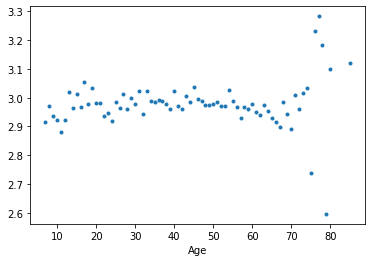

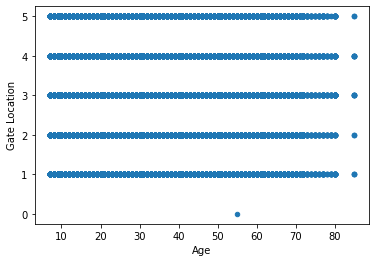

In [25]:
m = df.groupby(by='Age')['Gate Location'].mean()
m.plot(style='.')

#df["Gender"].replace(["Male", "Female"], [0,1], inplace=True)
Cover = df["Age"].cov(df["Gate Location"])
print(f'Coverage: {Cover}')
Corr = df["Age"].corr(df["Gate Location"])
print(f'Correlation: {Corr}') 
df.plot.scatter(x="Age", y="Gate Location")
plt.show()

### c.) Do first time passengers have more or less expectations than returning customers measured in terms of overall satisfaction?

First Time Flyers
Mean:  0.2396972245584525 Amount:  23780


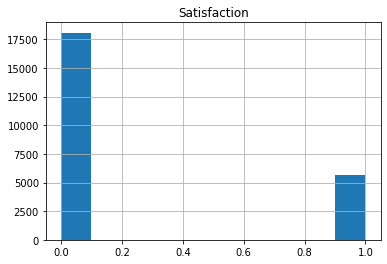

Returning Flyers
Mean:  0.478114985862394 Amount:  106100


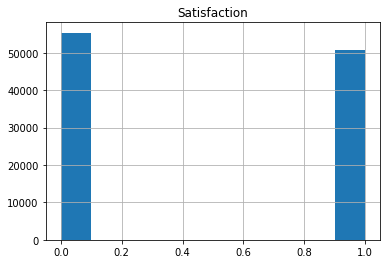

In [49]:
df["Satisfaction"].replace(["Neutral or Dissatisfied", "Satisfied"], [0,1], inplace=True)
group = df.groupby(df["Customer Type"])
First = group.get_group("First-time")
Returners = group.get_group("Returning")
histplotFirst = First.hist(column=['Satisfaction'])
print("First Time Flyers")
print("Mean: ",First['Satisfaction'].mean(), "Amount: ",First.shape[0])
plt.show()
print("Returning Flyers")
histplotReturners = Returners.hist(column=['Satisfaction'])
print("Mean: ",Returners['Satisfaction'].mean(), "Amount: ",Returners.shape[0])

plt.show()
#df["Customer Type"].replace(["First-time", "Returning"], [0,1], inplace=True)
#
#print(df.groupby(by='Customer Type')['Satisfaction'].mean())
#Cover = df["Customer Type"].cov(df["Satisfaction"])
#print(f'Coverage: {Cover}')
#Corr = df["Customer Type"].corr(df["Satisfaction"])
#print(f'Correlation: {Corr}') 

### d.) Is there a distinct (statistically significant) difference between business and personal travelers (A5) in terms of their reaction to their flights? (Hint: Use any attribute(s) that you think appropriate to measure their reaction.)

Business Flyers: 89693 

Baggage Handling                          3.658190
In-flight Entertainment                   3.494643
In-flight Wifi Service                    2.822896
In-flight Service                         3.660732
Food and Drink                            3.266186
Cleanliness                               3.360730
Leg Room Service                          3.473883
Seat Comfort                              3.554146
On-board Service                          3.434538
Gate Location                             3.002486
Online Boarding                           3.455175
Check-in Service                          3.292498
Ease of Online Booking                    2.882678
Departure and Arrival Time Convenience    2.794856
Satisfaction                              0.583724
dtype: float64


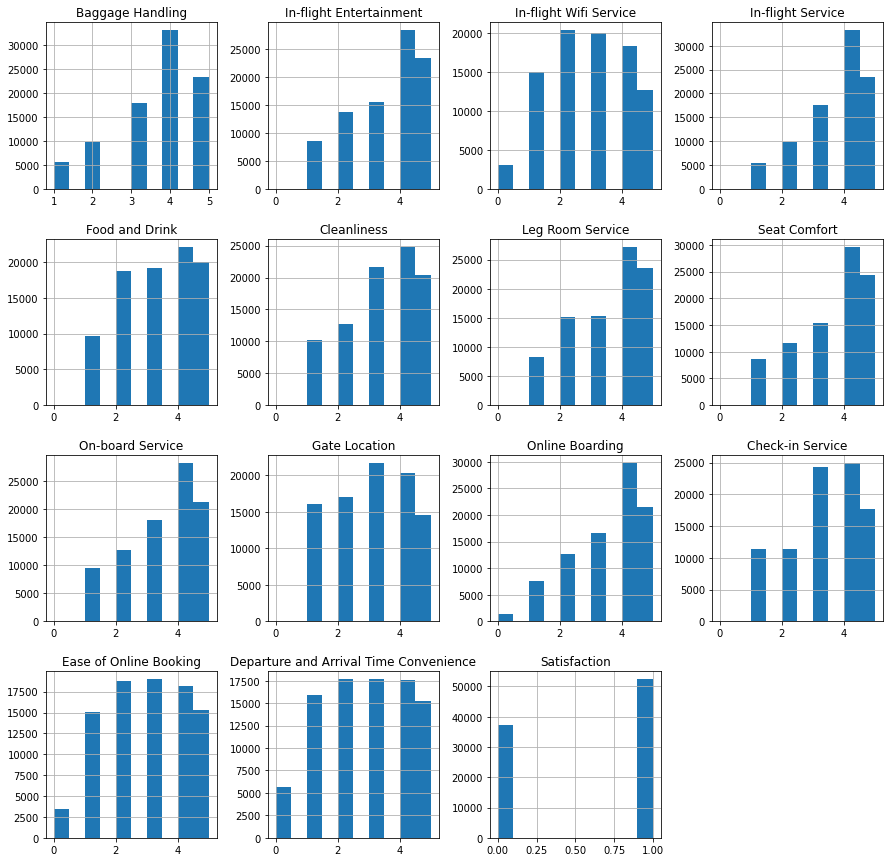

--------------------------------------------------------------------------------------------------------------------
Personal Flyers: 40187 

Baggage Handling                          3.573917
In-flight Entertainment                   3.053276
In-flight Wifi Service                    2.518451
In-flight Service                         3.600816
Food and Drink                            3.067708
Cleanliness                               3.120263
Leg Room Service                          3.076343
Seat Comfort                              3.189638
On-board Service                          3.268047
Gate Location                             2.919875
Online Boarding                           2.800582
Check-in Service                          3.337000
Ease of Online Booking                    2.476099
Departure and Arrival Time Convenience    3.644014
Satisfaction                              0.101326
dtype: float64


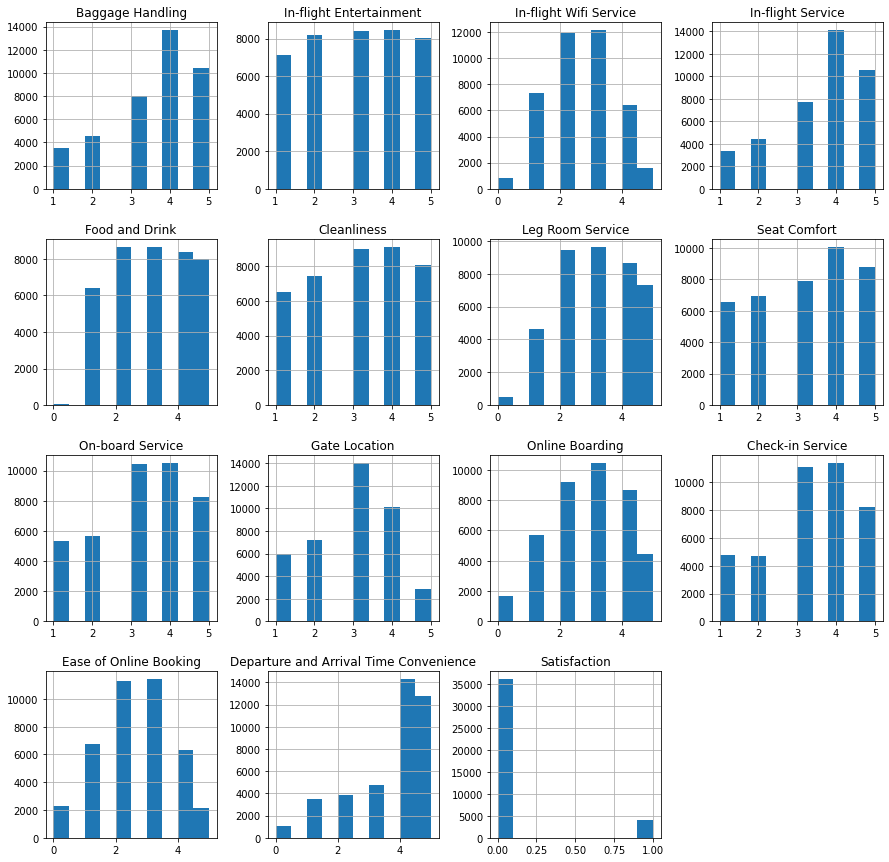

In [64]:
plt.rcParams["figure.figsize"] = (15,15)

group = df.groupby(df["Type of Travel"])
Business = group.get_group("Business")
Personal = group.get_group("Personal")

print(f"Business Flyers: {Business.shape[0]} \n")
BuisnessMean = Business[['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"]].mean()
print(BuisnessMean)
Business.hist(column=['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"])
plt.show()
print("--------------------------------------------------------------------------------------------------------------------")
print(f"Personal Flyers: {Personal.shape[0]} \n")
PersonalMean = Personal[['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"]].mean()
print(PersonalMean)
histplot = Personal.hist(column=['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"])
#df["Flight Distance"].value_counts().plot.bar(rot=0)
plt.show()

### e.) Is there a distinct (statistically significant) difference between business class passengers and economy passengers (A6) in terms of their reaction to satisfaction with food-and-drink? 

Business Class: 62160 

Baggage Handling                          3.844852
In-flight Entertainment                   3.639350
In-flight Wifi Service                    2.775917
In-flight Service                         3.846268
Food and Drink                            3.329955
Cleanliness                               3.481998
Leg Room Service                          3.646042
Seat Comfort                              3.763707
On-board Service                          3.682529
Gate Location                             2.985103
Online Boarding                           3.719032
Check-in Service                          3.521010
Ease of Online Booking                    2.915653
Departure and Arrival Time Convenience    2.907915
Satisfaction                              0.694434
dtype: float64


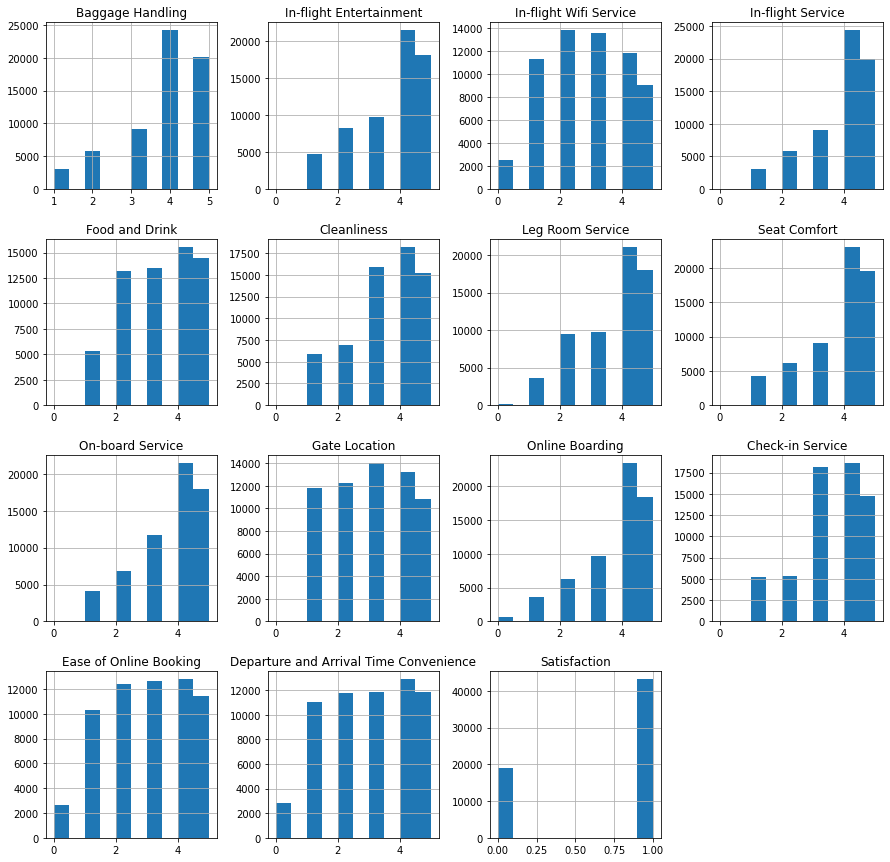

--------------------------------------------------------------------------------------------------------------------
Economy Plus Class: 9411 

Baggage Handling                          3.351504
In-flight Entertainment                   3.120497
In-flight Wifi Service                    2.756030
In-flight Service                         3.382850
Food and Drink                            3.110403
Cleanliness                               3.118478
Leg Room Service                          3.056211
Seat Comfort                              3.168207
On-board Service                          3.036234
Gate Location                             2.968441
Online Boarding                           2.885559
Check-in Service                          3.014557
Ease of Online Booking                    2.661991
Departure and Arrival Time Convenience    3.209967
Satisfaction                              0.246414
dtype: float64


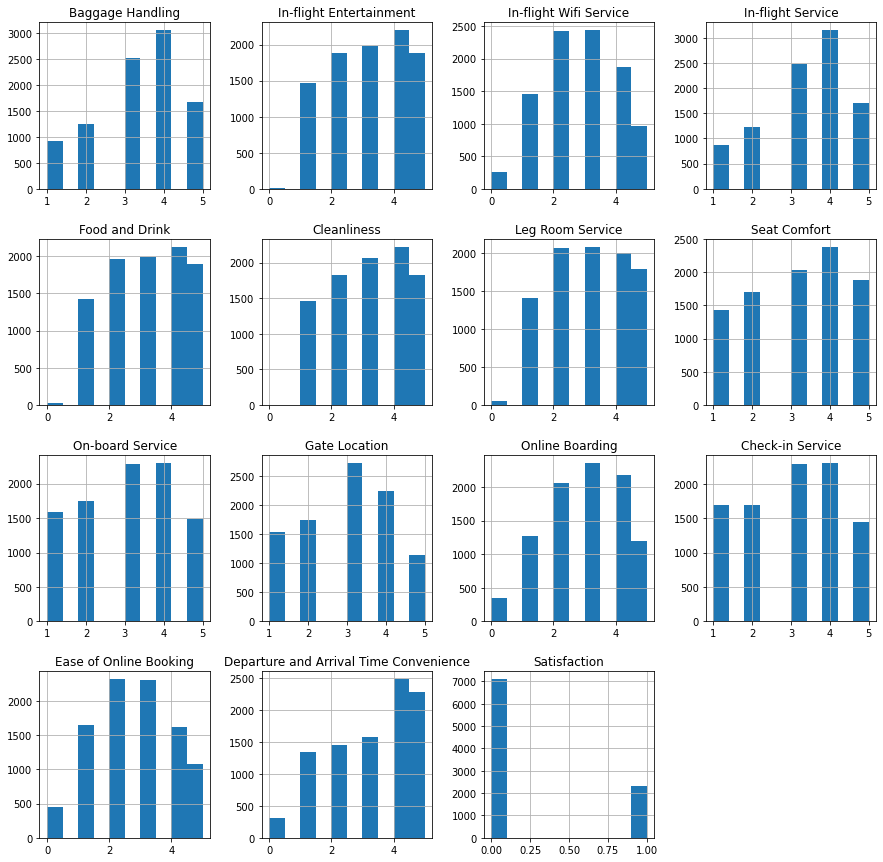

--------------------------------------------------------------------------------------------------------------------
Economy Class: 58309 

Baggage Handling                          3.450617
In-flight Entertainment                   3.096572
In-flight Wifi Service                    2.673944
In-flight Service                         3.466497
Food and Drink                            3.086556
Cleanliness                               3.104821
Leg Room Service                          3.083778
Seat Comfort                              3.141813
On-board Service                          3.119707
Gate Location                             2.969576
Online Boarding                           2.814677
Check-in Service                          3.124423
Ease of Online Booking                    2.602926
Departure and Arrival Time Convenience    3.192577
Satisfaction                              0.187673
dtype: float64


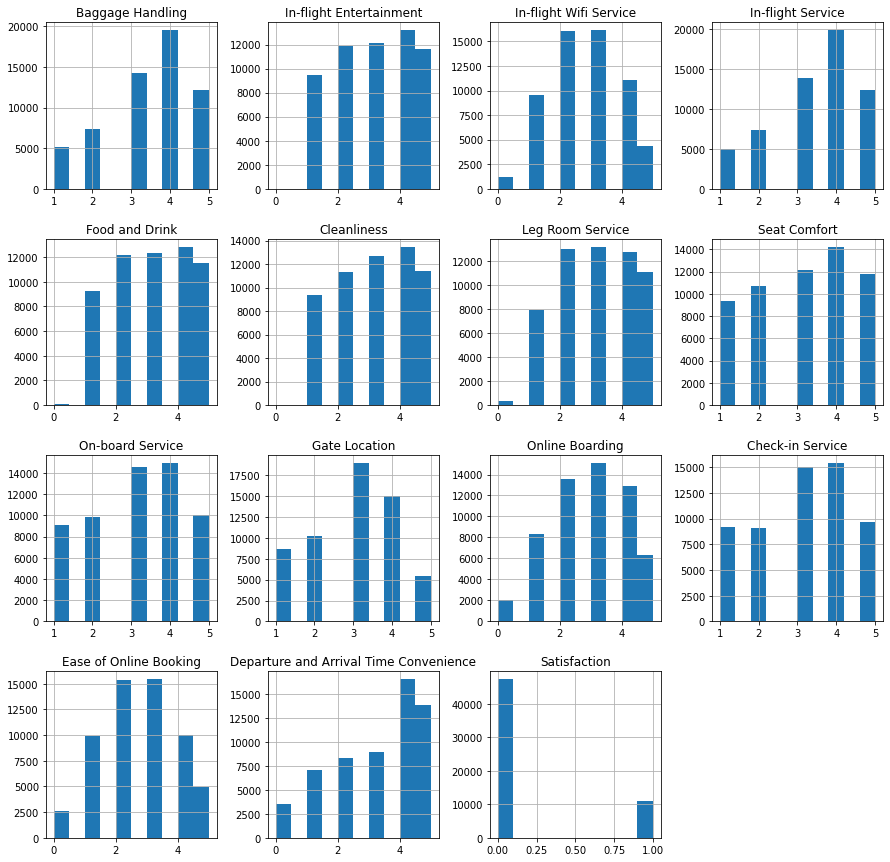

In [65]:
plt.rcParams["figure.figsize"] = (15,15)

group = df.groupby(df["Class"])
Business = group.get_group("Business")
Economy = group.get_group("Economy")
EconomyPlus = group.get_group("Economy Plus")
print(f"Business Class: {Business.shape[0]} \n")
BuisnessMean = Business[['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"]].mean()
print(BuisnessMean)
Business.hist(column=['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"])
plt.show()
print("--------------------------------------------------------------------------------------------------------------------")
print(f"Economy Plus Class: {EconomyPlus.shape[0]} \n")
EplusMean = EconomyPlus[['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"]].mean()
print(EplusMean)
histplot = EconomyPlus.hist(column=['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"])
#df["Flight Distance"].value_counts().plot.bar(rot=0)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------")
print(f"Economy Class: {Economy.shape[0]} \n")
EconomyMean = Economy[['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"]].mean()
print(EconomyMean)
histplot = Economy.hist(column=['Baggage Handling',"In-flight Entertainment","In-flight Wifi Service","In-flight Service","Food and Drink","Cleanliness","Leg Room Service","Seat Comfort","On-board Service","Gate Location","Online Boarding","Check-in Service","Ease of Online Booking","Departure and Arrival Time Convenience","Satisfaction"])
#df["Flight Distance"].value_counts().plot.bar(rot=0)
plt.show()

## Step 8. Other Questions

### a.) Determine if any relationship exists between check-in service (A12) and baggage handling (A23) using any data mining technique. Based on this, provide a guidance to airline executives.

There is not a relationship between A12 and A23 as the only rules that have a confidence of only above 30% (low confidence) "Check-in Service=4 36333 ==> Baggage Handling=4".

![8a.jpg](8a.jpg)

### b.) Between A10 and A16, which one do you think passengers value the most? Assume that the overall satisfaction (A24) is a good proxy for the value.

Through testing with multiple forms of data mining techniques you can come to the conclusion that online Boarding is what passangers value the most out of the variables from A10-A16. By creating rules we notice that by using online boarding gave us confidence levels of atleast 80%. This can then be seen then be seen also when creating a linear Regression model that the largest attribute in the equation is online boarding at 0.4212. Finally we can also do a simple attribute ranking which tells us that online boarding is ranked at number 1 at just over 50%. 

![8b1.jpg](8b1.jpg)
![8b2.jpg](8b2.jpg)
![8b3.jpg](8b3.jpg)

## Appendix